## Example: Polynomials and sines: cofiam, cosine, savgol

We create synthetic test data:

In [1]:
import numpy as np
from wotan import flatten

points = 1000
time = np.linspace(0, 30, points)
flux = 1 + ((np.sin(time) + time / 10 + time**1.5 / 100) / 1000)
noise = np.random.normal(0, 0.0001, points)
flux += noise
for i in range(points):
    if i % 75 == 0:
        flux[i:i+5] -= 0.0004  # Add some transits
        flux[i+50:i+52] += 0.0002  # and flares
flux[300:400] = np.nan  # and a gap

Run wotan. Note that the window for ``savgol`` must be given in cadences:

In [15]:
flatten_lc1, trend_lc1 = flatten(
    time,                 # Array of time values
    flux,                 # Array of flux values
    method='cofiam',
    window_length=0.5,    # The length of the filter window in units of ``time``
    break_tolerance=0.5,  # Split into segments at breaks longer than that
    return_trend=True,    # Return trend and flattened light curve
    )

flatten_lc2, trend_lc2 = flatten(
    time,                 # Array of time values
    flux,                 # Array of flux values
    method='cosine',
    robust=True,          # Iteratively clip 2-sigma outliers until convergence
    window_length=0.5,    # The length of the filter window in units of ``time``
    break_tolerance=0.5,  # Split into segments at breaks longer than that
    return_trend=True,    # Return trend and flattened light curve
    )

flatten_lc3, trend_lc3 = flatten(
    time,                 # Array of time values
    flux,                 # Array of flux values
    method='savgol',
    window_length=int(1000/60),    # The length of the filter window in cadences
    break_tolerance=0.5,  # Split into segments at breaks longer than that
    return_trend=True,    # Return trend and flattened light curve
    )

Iteration: 1 Rejected outliers (total): 12
Iteration: 2 Rejected outliers (total): 17
Iteration: 3 Rejected outliers (total): 18
Iteration: 4 Rejected outliers (total): 19
Iteration: 5 Rejected outliers (total): 19
Converged.
Iteration: 1 Rejected outliers (total): 20
Iteration: 2 Rejected outliers (total): 23
Iteration: 3 Rejected outliers (total): 23
Converged.


C:\Users\Michael\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Visualize the result. If we would have set ``robust=False`` for the ``cosine`` method, ``cosine`` and ``cofiam`` would have produced identical results. This is because both fit sums of sines and cosines, and ``cofiam`` selects the order for which autocorrelation is minimal. For the data at hand, this order is the highest allowed as defined by ``window_length``, as for the ``cosine`` method.

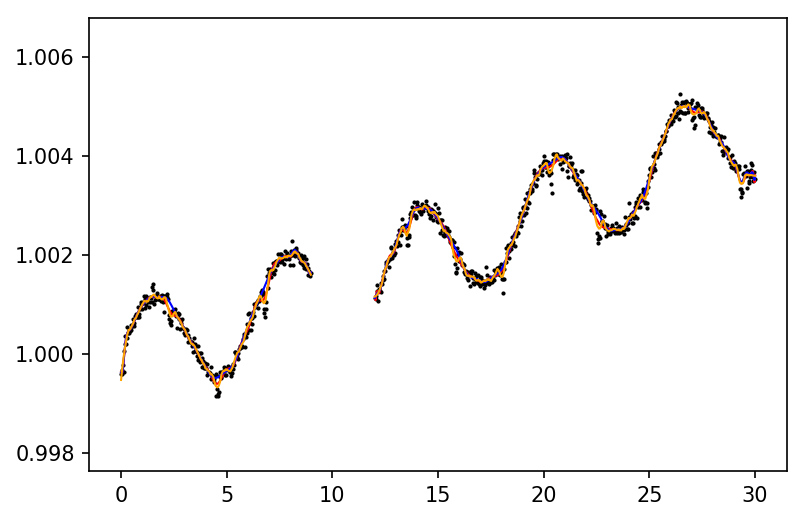

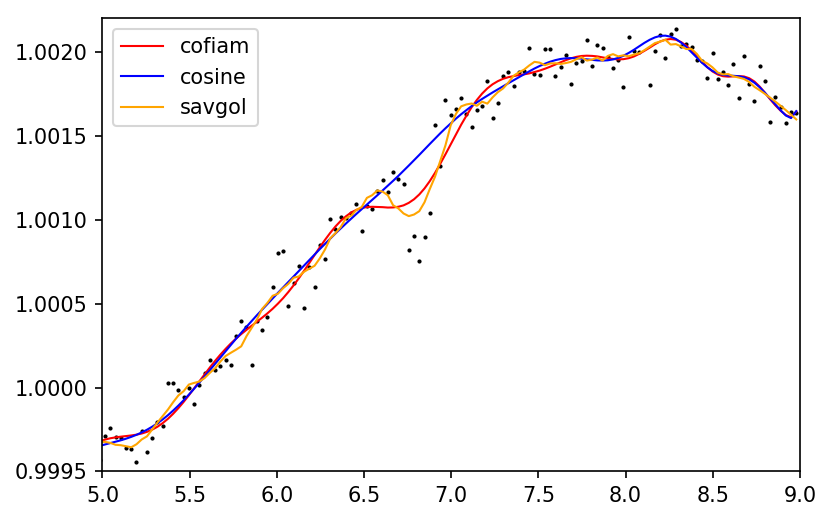

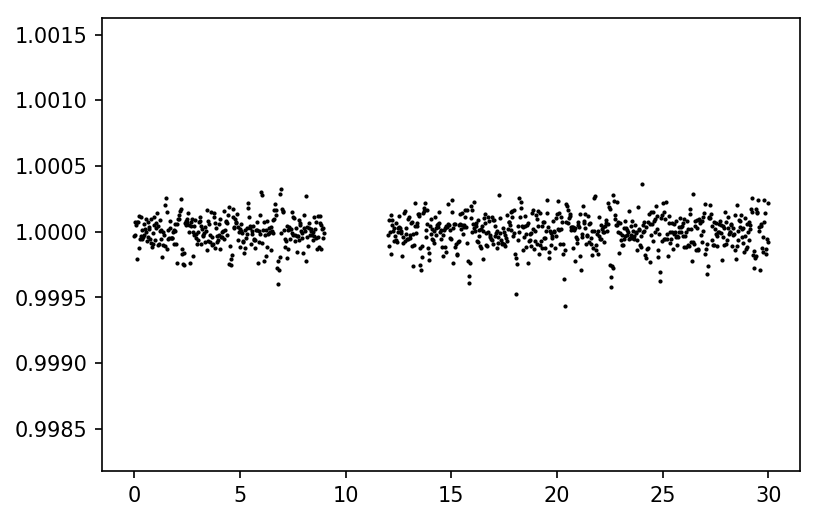

In [17]:
import matplotlib.pyplot as plt
from matplotlib import rcParams; rcParams["figure.dpi"] = 150

plt.scatter(time, flux, s=1, color='black')
plt.plot(time, trend_lc1, color='red', linewidth=1)
plt.plot(time, trend_lc2, color='blue', linewidth=1)
plt.plot(time, trend_lc3, color='orange', linewidth=1)
plt.show();
plt.close()

plt.scatter(time, flux, s=1, color='black')
plt.plot(time, trend_lc1, color='red', linewidth=1, label='cofiam')
plt.plot(time, trend_lc2, color='blue', linewidth=1, label='cosine')
plt.plot(time, trend_lc3, color='orange', linewidth=1, label='savgol')
plt.xlim(5, 9)
plt.ylim(0.9995, 1.0022)
plt.legend()
plt.show();
plt.close()

plt.scatter(time, flatten_lc1, s=1, color='black');